# Christopher Reid - CSC 380 - Homework 3

In [1]:
# Imports
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

# Part 1: Project Setup
- Download the dataset from the website. Place the file in the same folder that you have your Ipython notebook. So your code will be pd.read_csv(’filename.csv’). ie no folders in paths.

- Read the data into a dataframe named data_df.

- Show 5 random rows of the dataframe.

In [2]:
data_df = pd.read_csv('dataset.csv')
data_df.sample(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1077,12/20/2016 16:56,12/20/2016 17:07,Business,Islamabad,Islamabad,1.4,Errand/Supplies
1078,12/20/2016 18:47,12/20/2016 19:21,Business,Islamabad,Unknown Location,10.3,Customer Visit
1047,12-12-2016 20:48,12-12-2016 20:57,Business,Morrisville,Cary,3.0,Customer Visit
935,11-10-2016 19:18,11-10-2016 19:21,Business,West Berkeley,Central,0.8,NaN
428,06-11-2016 17:50,06-11-2016 17:56,Business,Westpark Place,Whitebridge,1.7,NaN


# Part 2: Dataset Description

**1. Print a concise summary of a DataFrame. Output expected below.**

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


**2. Generate descriptive statistics. Output expected below.**

In [4]:
data_df['MILES'].describe().to_frame()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


# Part 3: Data Processing

## 3.1: Start Date

**1. Check if there are any NaN values in the Start Date column.**

In [5]:
data_df['START_DATE'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1151    False
1152    False
1153    False
1154    False
1155    False
Name: START_DATE, Length: 1156, dtype: bool

**2. Extract the time part of the start date string, and save it to a new column named start
time.**

In [6]:
def format_time(input_str):
    cleaned_str = input_str.split(' ')[1]
    return cleaned_str

In [7]:
data_df['start time'] = data_df['START_DATE'].iloc[:1155].apply(lambda input_str: format_time(input_str))
data_df['start time']

0       21:11
1       01:25
2       20:25
3       17:31
4       14:42
        ...  
1151    13:24
1152    15:03
1153    21:32
1154    22:08
1155      NaN
Name: start time, Length: 1156, dtype: object

**3. Convert the column Start date to an appropriate datatype.**

In [8]:
def convert_startdate(input_string):
    if '-' in input_string:
        new_string = datetime.strptime(input_string,'%m-%d-%Y %H:%M')
    else:
        new_string = datetime.strptime(input_string,'%m/%d/%Y %H:%M')
    return new_string

In [9]:
data_df['START_DATE'] = data_df['START_DATE'].iloc[:1155].apply(lambda input_str: convert_startdate(input_str))
data_df['START_DATE']

0      2016-01-01 21:11:00
1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
               ...        
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
1155                   NaT
Name: START_DATE, Length: 1156, dtype: datetime64[ns]

## 3.2: End Date

**1. Check if there are any NaN values in the End Date Column.**

In [10]:
data_df['END_DATE'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1151    False
1152    False
1153    False
1154    False
1155     True
Name: END_DATE, Length: 1156, dtype: bool

**2. How many NaN values are present in the column?**

In [11]:
data_df['END_DATE'].isnull().sum()

1

**3. Display the row or rows with the NaN values for the End Date Column.**

In [12]:
data_df[data_df['END_DATE'].isnull()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start time
1155,NaT,NaN,NaN,NaN,NaN,12204.7,NaN,NaN


**4. Remove that row from the data_df dataframe.**

In [13]:
data_df = data_df[data_df['END_DATE'].isnull() == False]
data_df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start time
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,01:25
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting,1:07
1151,2016-12-31 13:24:00,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13:24
1152,2016-12-31 15:03:00,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,15:03
1153,2016-12-31 21:32:00,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,21:32


**5. Extract the time part of the end date string, and save it to a new column named end
time.**

In [14]:
data_df['end time'] = data_df['END_DATE'].iloc[:1155].apply(lambda input_str: format_time(input_str))
data_df['end time']

0       21:17
1       01:37
2       20:38
3       17:45
4       15:49
        ...  
1150     1:14
1151    13:42
1152    15:38
1153    21:50
1154    23:51
Name: end time, Length: 1155, dtype: object

**6. Convert the column End Date to an appropriate datatype.**

In [15]:
data_df['END_DATE'] = data_df['END_DATE'].iloc[:1155].apply(lambda input_str: convert_startdate(input_str))
data_df['END_DATE']

0      2016-01-01 21:17:00
1      2016-01-02 01:37:00
2      2016-01-02 20:38:00
3      2016-01-05 17:45:00
4      2016-01-06 15:49:00
               ...        
1150   2016-12-31 01:14:00
1151   2016-12-31 13:42:00
1152   2016-12-31 15:38:00
1153   2016-12-31 21:50:00
1154   2016-12-31 23:51:00
Name: END_DATE, Length: 1155, dtype: datetime64[ns]

**7. Confirm the changes to datatype by using the function you used in Q2.1**

In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
 7   start time  1155 non-null   object        
 8   end time    1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 90.2+ KB


## 3.3: Category

**1. Check if there are any null values in the column Category**

In [17]:
data_df['CATEGORY'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1150    False
1151    False
1152    False
1153    False
1154    False
Name: CATEGORY, Length: 1155, dtype: bool

**2. Print the labels in the column Category.**

In [18]:
print(data_df['CATEGORY'].unique())

['Business' 'Personal']


**3. Print the number of data points for each label in the column Category.**

In [19]:
data_df['CATEGORY'].value_counts()

CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64

## 3.4: Start

**1. Check if there are any null values in the column Start**

In [20]:
data_df['START'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1150    False
1151    False
1152    False
1153    False
1154    False
Name: START, Length: 1155, dtype: bool

**2. What are the different start locations for the rides in the dataset?**

In [21]:
data_df['START'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven

**3. Create a new dataframe with the name of the start location and a number of rides with
that start location.**

In [22]:
start_location_df = data_df['START'].value_counts().to_frame()
start_location_df

,count
START,
Cary,201
Unknown Location,148
Morrisville,85
Whitebridge,68
Islamabad,57
...,...
Florence,1
Ridgeland,1
Daytona Beach,1


**4. Which is the most popular ride start location?**

In [23]:
start_location_df.idxmax()

count    Cary
dtype: object

**5. Amoung all the start locations you listed, you will notice that one location is not the
name of an actual location. What label was used instead of an actual location here?**

In [24]:
start_location_df.index[start_location_df['count'] == 148]

Index(['Unknown Location'], dtype='object', name='START')

**6. How many rows have that label?**

In [25]:
len(data_df[data_df['START'] == 'Unknown Location'])

148

**7. Display 10 sample rows with that label as the start location.**

In [26]:
data_df[data_df['START'] == 'Unknown Location'].sample(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start time,end time
810,2016-10-14 08:50:00,2016-10-14 09:44:00,Business,Unknown Location,R?walpindi,12.7,NaN,8:50,9:44
132,2016-02-19 16:26:00,2016-02-19 16:45:00,Business,Unknown Location,Islamabad,3.5,NaN,16:26,16:45
680,2016-08-19 12:07:00,2016-08-19 12:24:00,Business,Unknown Location,Islamabad,5.7,NaN,12:07,12:24
153,2016-02-21 16:04:00,2016-02-21 16:32:00,Business,Unknown Location,Unknown Location,9.7,NaN,16:04,16:32
719,2016-08-26 16:55:00,2016-08-26 17:12:00,Business,Unknown Location,Lahore,2.9,NaN,16:55,17:12
812,2016-10-14 15:56:00,2016-10-14 16:20:00,Business,Unknown Location,Unknown Location,3.8,NaN,15:56,16:20
736,2016-08-29 15:49:00,2016-08-29 15:59:00,Business,Unknown Location,Islamabad,2.8,NaN,15:49,15:59
762,2016-09-18 18:07:00,2016-09-18 18:11:00,Business,Unknown Location,Unknown Location,9.4,NaN,18:07,18:11
657,2016-08-15 15:20:00,2016-08-15 15:47:00,Business,Unknown Location,Unknown Location,14.1,NaN,15:20,15:47
1082,2016-12-21 12:51:00,2016-12-21 13:33:00,Business,Unknown Location,Unknown Location,16.2,Meeting,12:51,13:33


## 3.5 Stop

**1. Check if there are any null values in the column Stop**

In [27]:
data_df['STOP'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1150    False
1151    False
1152    False
1153    False
1154    False
Name: STOP, Length: 1155, dtype: bool

**2. What are the different end locations for the rides in the dataset?**

In [28]:
data_df['STOP'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Palm Beach', 'Cary',
       'Morrisville', 'New York', 'Queens', 'East Harlem', 'NoMad',
       'Midtown', 'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Queens County', 'Gulfton', 'Downtown',
       'Houston', 'Jamestown Court', 'Durham', 'Whitebridge',
       'Lake Wellingborough', 'Raleigh', 'Umstead', 'Hazelwood',
       'Westpark Place', 'Meredith Townes', 'Leesville Hollow', 'Apex',
       'Chapel Hill', 'Williamsburg Manor', 'Macgregor Downs',
       'Edgehill Farms', 'Northwoods', 'Tanglewood', 'Preston',
       'Walnut Terrace', 'Jackson Heights', 'East Elmhurst',
       'Midtown West', 'Long Island City', 'Jamaica', 'Unknown Location',
       'Colombo', 'Nugegoda', 'Katunayaka', 'Islamabad', 'R?walpindi',
       'Noorpur Shahan', 'Heritage Pines', 'Waverly Place', 'Wayne Ridge',
       'Depot Historic District', 'Weston', 'West University',
       'South Congress', 'Arts District', 'Congress Ave District

**3. Create a new dataframe with the name of the end location and the number of rides with
that end location.**

In [29]:
end_location_df = data_df['STOP'].value_counts().to_frame()
end_location_df

,count
STOP,
Cary,203
Unknown Location,149
Morrisville,84
Whitebridge,65
Islamabad,58
...,...
Daytona Beach,1
Sand Lake Commons,1
Sky Lake,1


**4. Which is the most popular ride end location?**

In [30]:
end_location_df.idxmax()

count    Cary
dtype: object

**5. Among all the end locations you listed, you will notice that one location is not the name
of an actual location. What label was used instead of an actual location here?**

In [31]:
end_location_df.index[end_location_df['count'] == 149]

Index(['Unknown Location'], dtype='object', name='STOP')

**6. How many rows have that label?**

In [32]:
len(data_df[data_df['STOP'] == 'Unknown Location'])

149

## 3.6 Miles

**1. Are there any null values in the column miles?**

In [33]:
data_df['MILES'].isnull().sum()

0

**2. What are the average and median miles for rides?**

In [34]:
# Average
data_df['MILES'].mean()

10.566839826839827

In [35]:
# Median
data_df['MILES'].median()

6.0

## 3.7 Purpose

**1. What are the different purposes recorded for the rides?**

In [36]:
data_df['PURPOSE'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

**2. What is the most popular known purpose?**

In [37]:
data_df['PURPOSE'].value_counts().idxmax()

'Meeting'

**3. What percentage of total rides were for the purpose above?**

In [38]:
meetings = data_df['PURPOSE'].value_counts().max()
total_rides = len(data_df['PURPOSE'])

meetings_percent = round((meetings / total_rides) * 100, 2)
print('Percentage of total rides for meetings: ' + str(meetings_percent) + '%')

Percentage of total rides for meetings: 16.19%


# Part 4: Data Exploration

**Play around with the data, ie look into the data. Give three insights about rides that you
found. Example: The most popular start location for the rides are ..., The busiest time ie time
with the most rides are..., The most popular start and end locations for business rides are...**

**Insight 1: The furthest distance traveled was 310.5 miles and the shortest was .5 miles**

In [39]:
print('furthest distance: ' + str(data_df['MILES'].max()))
print('shortest distance: ' + str(data_df['MILES'].min()))

furthest distance: 310.3
shortest distance: 0.5


**Insight 2: The busiest departure/start time occurs at 17:50**

In [40]:
data_df['start time'].value_counts().idxmax()

'17:50'

**Insight 3: The avg milage for personal and business rides are 9.32 and 10.66 miles respectively**

In [41]:
personal_df = data_df[data_df['CATEGORY'] =='Personal']
business_df = data_df[data_df['CATEGORY'] =='Business']
print('Personal ride avg miles: ' + str(round(personal_df['MILES'].mean(), 2)))
print('Business ride avg miles: ' + str(round(business_df['MILES'].mean(), 2)))

Personal ride avg miles: 9.32
Business ride avg miles: 10.66


# Part 5: Data Visualisation
**Use Matplotlib for all the coding questions in this section. Give appropriate title, x and
y-axis labels, and legend where applicable.**

**1. Show a donut chart displaying the purpose of the trips, where the purpose is known.**

In [42]:
purpose_df = data_df[data_df['PURPOSE'].notnull()]
names = purpose_df['PURPOSE'].value_counts().index.tolist()
counts = purpose_df['PURPOSE'].value_counts().to_list()

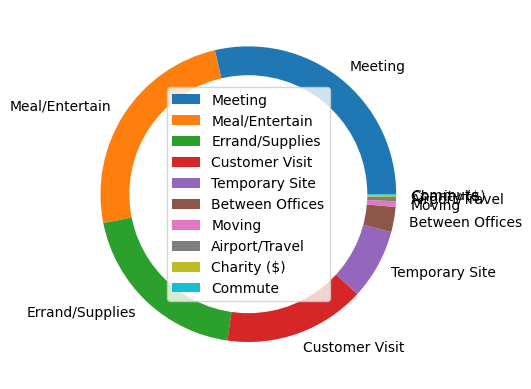

In [43]:
my_circle = plt.Circle((0, 0), 0.8, color='white')
plt.pie(counts, labels = names)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(loc='center')
plt.show()

**2. Show a histogram with the distribution of miles driven. Use 10 equal-width bins.**

Text(0, 0.5, 'Distance Frequency')

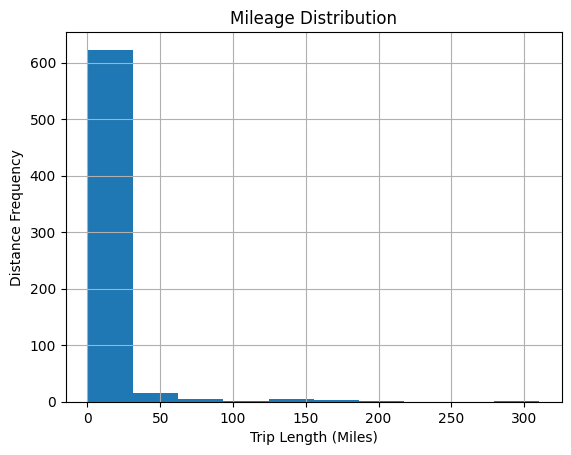

In [44]:
purpose_df.hist(column='MILES', bins=10)
plt.title('Mileage Distribution')
plt.xlabel('Trip Length (Miles)')
plt.ylabel('Distance Frequency')

**3. Show any other visualization of your choice to visualise something from the dataset.**

**This pie chart shows the percentage of the top 10 starting locations.** 

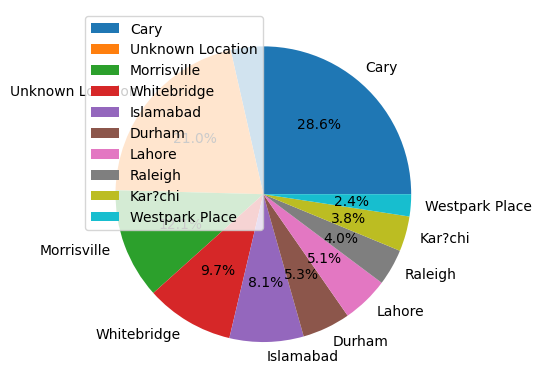

In [45]:
start_counts = data_df['START'].value_counts().to_list()[:10]
start_locals = data_df['START'].value_counts().index.to_list()[:10]
plt.pie(start_counts, labels=start_locals,autopct='%1.1f%%')
plt.legend()
plt.show()

# Part 6: Linear Regression

## 6.1: Data Preparation

**1. The features we will use are the start location, category, and purpose. Perform label
encoding on the three features and store them in a variable X**

In [46]:
encode_columns = ['START','CATEGORY','PURPOSE']
X = data_df[encode_columns].apply(LabelEncoder().fit_transform).to_numpy()
X

array([[ 52,   0,   6],
       [ 52,   0,  10],
       [ 52,   0,   5],
       ...,
       [162,   0,   7],
       [ 77,   0,   9],
       [ 55,   0,   9]])

**2. Store the miles driven in Y**

In [47]:
miles_driven = ['MILES']
Y = data_df[miles_driven].apply(LabelEncoder().fit_transform).to_numpy()
Y

array([[ 46],
       [ 45],
       [ 43],
       ...,
       [152],
       [ 59],
       [229]])

**3. Split the dataset ( X, Y) you prepared above into Train (80%), Validation (10%), and
Test (10%) splits. Use the sklearn function, you may have to use the function twice.**

In [48]:
X_train, X_test_and_val, Y_train, Y_test_and_val = train_test_split(X,Y, train_size=.8)
X_val, X_test, Y_val, Y_test = train_test_split(X_test_and_val, Y_test_and_val, test_size =.5)
print(len(X_train),len(X_val),len(X_test))
print(len(Y_train),len(Y_val),len(Y_test))

924 115 116
924 115 116


## 6.2 Model Training

**Train the following models using the data you have. Save the test performance (metric:
MSE ) of each of the models on the validation dataset. You can choose whatever parameters
you think fit, or just go with the default. It is up to your discretion.**
- Linear Regression
- Lasso
- Ridge

In [49]:
# Linear Regression
linear_regression_model = LinearRegression()

linear_regression_model.fit(X_val, Y_val)
linear_regression_prediction = linear_regression_model.predict(X_val)
mean_squared_error(Y_val, linear_regression_prediction)

3544.1178700553305

In [50]:
# Lasso
lasso_model = linear_model.Lasso()

lasso_model.fit(X_val, Y_val)
lasso_prediction = lasso_model.predict(X_val)
mean_squared_error(Y_val, lasso_prediction)

3549.2894492424566

In [51]:
# Ridge
ridge_model = linear_model.Ridge()

ridge_model.fit(X_val, Y_val)
ridge_prediction = ridge_model.predict(X_val)
mean_squared_error(Y_val, ridge_prediction)

3544.2182062482875

## 6.3 Pick the best model

In [52]:
top_model = LinearRegression()

top_model.fit(X_test, Y_test)
top_model_prediction = top_model.predict(X_test)
mean_squared_error(Y_test, top_model_prediction)

2652.306300757345

# 7: Final Notes
**Text Response**

**1. Why are datasets split into train, validation, and test?**

Splitting datasets into these categories allows for evaluating the accuracy of a predicitve model. 

The training set should be allocated 70% of the total data entries and is reserved for training the model and hopefully identify outliers in the data.

The validation set, separate from the training set, is used to validate the model's accuracy after being trained. This set is simply used to understand how well the model performs on data excluded from the training set.

Finally, the test set is meant to be evaluate the model's performance after the testing stage is completed. When the model is peformed over this set, a number is determied that conveys the expected produtive accuracy of the model. 

**2. What is overfitting and underfitting?**

Overfitting occurs when when a model conforms so accurately to a dataset that it is 'too good to be true'. The model does not categorize the data correctly because of too many fine details including outliers. The issue with this is the inability for the model to reliably predict future observations.

Underfitting is when a model fails to accurately capture the relationship between the input and output variables. This can result in a high error rate and some data observations going completely ignored. 

**3. How does Lasso differ from Ridge ?**

Both are regularization techniques used in linear regression to prevent overfitting. Lasso uses L1 Regularization which can force less important coefficients to become zero rendering them useless in the model equation while Ridge uses L2 Regularization which only reduces the impact of less important coefficients by shrinking them to near zero. Therefore, the main difference is the the penalty technique applied to the coefficients. 